### Problem Statement

##### Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

##### Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

##### Dataset: LoanTapData.csv

##### Data dictionary:
- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : LoanTap assigned loan grade
- sub_grade : LoanTap assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- open_acc : The number of open credit lines in the borrower's credit file.
- pub_rec : Number of derogatory public records
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc : The total number of credit lines currently in the borrower's credit file
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
- pub_rec_bankruptcies : Number of public record bankruptcies
- Address: Address of the individ


##### Concept Used:

   - Exploratory Data Analysis
   - Feature Engineering
   - Logistic Regression
   - Precision Vs Recall Tradeoff
   - What does ‘good’ look like?
    
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
- Check correlation among independent variables and how they interact with each other
- Simple Feature Engineering steps:
    - E.g.: Creation of Flags - If value greater than 1.0 then 1 else 0. This can be done on: 
       - 1. Pub_rec
       - 2. Mort_acc
       - 3. Pub_rec_bankruptcies
    
- Missing values and Outlier Treatment
- Scaling - Using MinMaxScaler or StandardScaler
- Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results
- Results Evaluation:
- Classification Report
- ROC AUC curve
- Precision recall curve
- Tradeoff Questions:
- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
- Provide actionable Insights & Recommendations

In [1730]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [1731]:
df=pd.read_csv(r"loan.csv")

In [1732]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-2012,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-2012,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [1733]:
df.shape

(396030, 27)

In [1734]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [1735]:
col_types=df.dtypes
col_types[col_types=="object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
title                  object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

In [1736]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [1737]:
df.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,395754.0,396030.0,358235.0,395495.0
mean,14113.9,13.6,431.8,74203.2,17.4,11.3,0.2,15844.5,53.8,25.4,1.8,0.1
std,8357.4,4.5,250.7,61637.6,18.0,5.1,0.5,20591.8,24.5,11.9,2.1,0.4
min,500.0,5.3,16.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
25%,8000.0,10.5,250.3,45000.0,11.3,8.0,0.0,6025.0,35.8,17.0,0.0,0.0
50%,12000.0,13.3,375.4,64000.0,16.9,10.0,0.0,11181.0,54.8,24.0,1.0,0.0
75%,20000.0,16.5,567.3,90000.0,23.0,14.0,0.0,19620.0,72.9,32.0,3.0,0.0
max,40000.0,31.0,1533.8,8706582.0,9999.0,90.0,86.0,1743266.0,892.3,151.0,34.0,8.0


In [1738]:
df.isnull() #df.isna()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1739]:
missing_values=(df.isna().sum()/df.shape[0])*100
missing_values

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [1740]:
def check_missing_values(df):
    # Count the number of missing values in each column
    missing_values=df.isna().sum()
    
    # Calculate the percentage of missing values for each column
    missing_percentage=(missing_values/len(df))*100
    
    # Create a DataFrame to store the missing value information
    missing_data_df=pd.DataFrame({'Missing Values':missing_values, "Missing Percentage": missing_percentage})
    
    # Sort the DataFrame in descending order of missing percentage
    missing_data_df=missing_data_df.sort_values('Missing Percentage', ascending=False)
    
    return missing_data_df
    
    

In [1741]:
missing_values_df = check_missing_values(df)

# Display the DataFrame of missing values
missing_values_df[missing_values_df['Missing Values']>0]

,Missing Values,Missing Percentage
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [1742]:
# Checking the distribution of the outcome labels
df.loan_status.value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [1743]:
df.term.value_counts(normalize=True)*100

 36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64

In [1744]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [1745]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


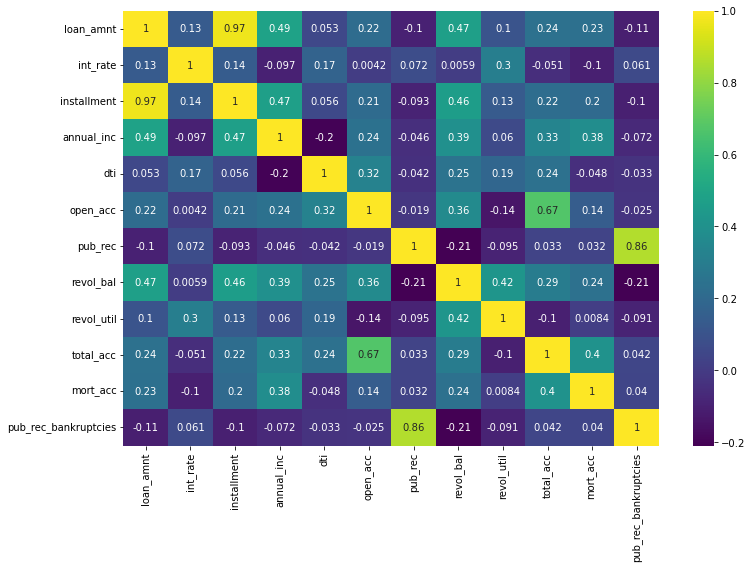

In [1746]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method="spearman"),annot=True, cmap='viridis')
plt.show()

- We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- So, we can drop either one of those columns.

In [1747]:
df.drop(columns=['installment'],axis=1,inplace=True)

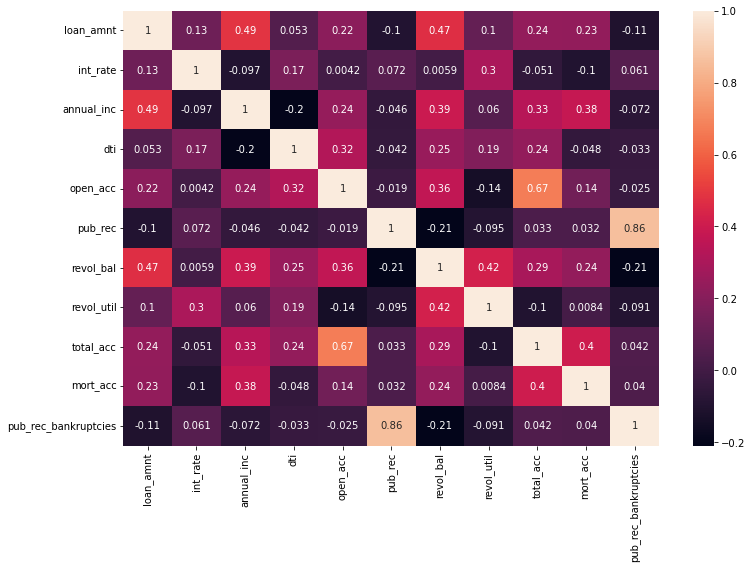

In [1748]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method="spearman"),annot=True)
plt.show()

## Data Exploration 

### loan_amnt

##### # people who have paid fully and the # people who are charged off

In [1749]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


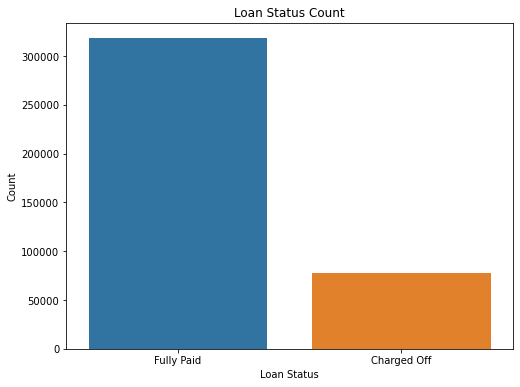

In [1750]:
# Count plot of Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

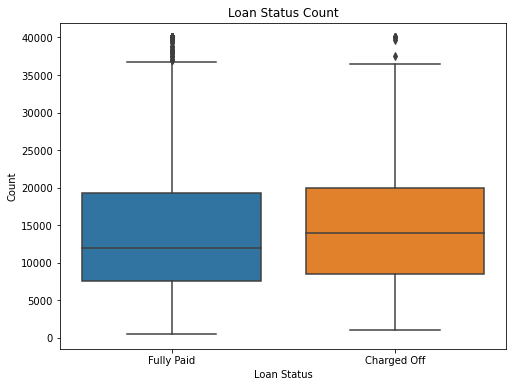

In [1751]:
# Box plot of Loan_Status vs. numerical variable
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

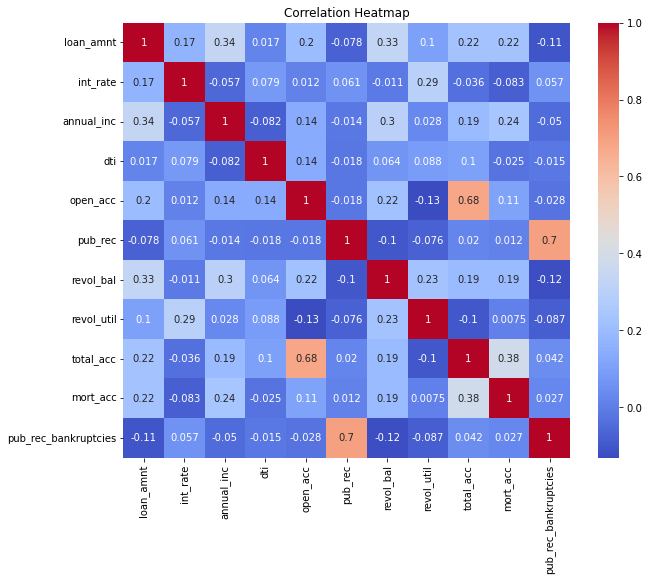

In [1752]:
# Heat map of correlation between Loan_Status and numerical variables
numerical_columns=df.select_dtypes(include=['int64','float64'])
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Home Ownership

In [1753]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [1754]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [1755]:
df['home_ownership'].replace({"ANY":"OTHER",
                             "NONE":"OTHER"},
                            inplace=True)

In [1756]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

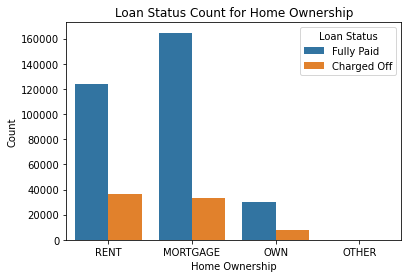

In [1757]:
# plt.figure(figsize=(8,6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Loan Status Count for Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

In [1758]:
df.loc[df["home_ownership"]=='OTHER','loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

### Interest Rate 

In [1759]:
df.groupby(by='loan_status')["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


<AxesSubplot:xlabel='int_rate'>

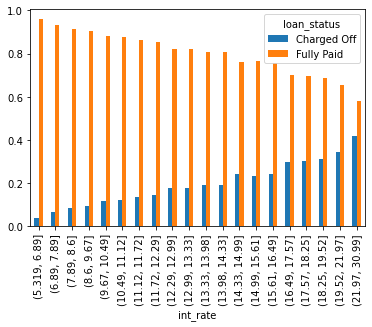

In [1760]:
pd.crosstab(columns=df['loan_status'], 
            index=pd.qcut(df['int_rate'], 20), 
            normalize="index").plot(kind='bar')

###### Higher the interest , probability of defailter is decreases. 

### Title

In [1761]:
df.groupby(by='loan_status')["title"].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,77344,9576,Debt consolidation,35088
Fully Paid,316931,42413,Debt consolidation,117384


    Some issue with the 'title' having duplicate values

In [1762]:
df["title"].value_counts()[:20]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

In [1763]:
df['title']=df.title.str.lower()

In [1764]:
df['title'].value_counts()[:20]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: title, dtype: int64

### Converting string to date-time format

In [1765]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

##### Loan Grades

In [1766]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   grade                 396030 non-null  object        
 4   sub_grade             396030 non-null  object        
 5   emp_title             373103 non-null  object        
 6   emp_length            377729 non-null  object        
 7   home_ownership        396030 non-null  object        
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  object        
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  object        
 12  purpose               396030 non-null  object        
 13 

In [1767]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [1768]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

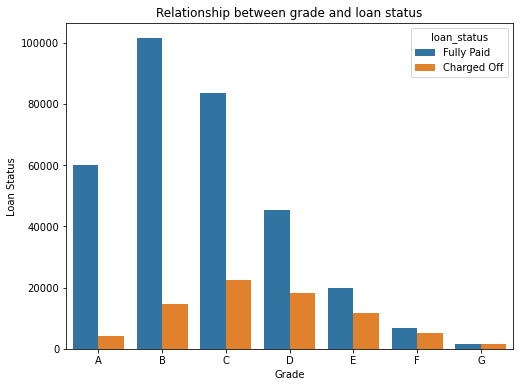

In [1769]:
plt.figure(figsize=(8,6))
grade=sorted(df.grade.unique().tolist())
sns.countplot(x='grade', hue='loan_status', data=df, order=grade)
plt.title('Relationship between grade and loan status')
plt.xlabel('Grade')
plt.ylabel('Loan Status')
plt.show()

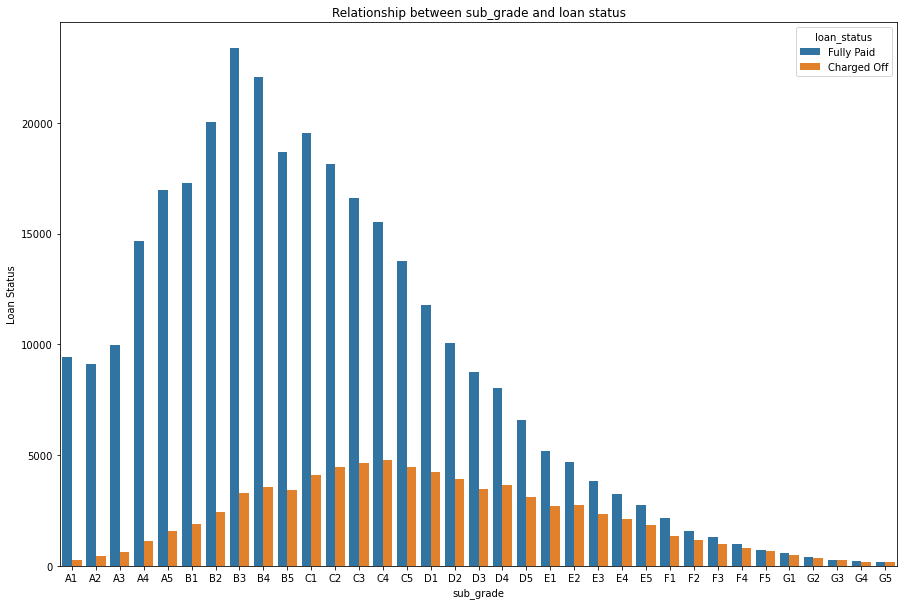

In [1770]:
plt.figure(figsize=(15,10))
sub_grade=sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade',hue='loan_status', data=df,order=sub_grade)
plt.title('Relationship between sub_grade and loan status')
plt.xlabel('sub_grade')
plt.ylabel('Loan Status')
plt.show()


#### Probability Plot for Categorical features

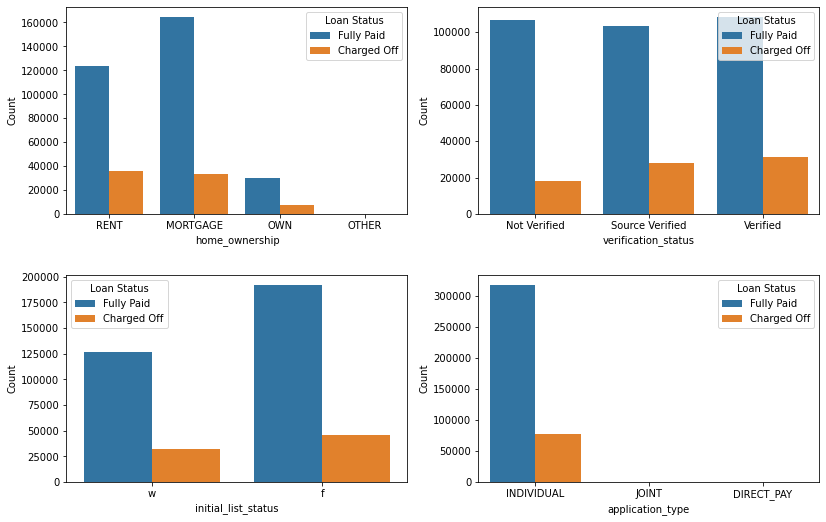

In [1771]:
# Select the categorical features of interest (replace with your actual feature names)
categorical_features = ['home_ownership', 'verification_status', 'initial_list_status', 'application_type']

# Set up the plot grid
num_plots = len(categorical_features)
num_cols = 2  # Number of columns in the grid
num_rows = (num_plots + 1) // num_cols  # Number of rows in the grid

# Create the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Iterate over the categorical features and create count plots
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=feature, hue='loan_status', data=df, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Loan Status')

plt.show()


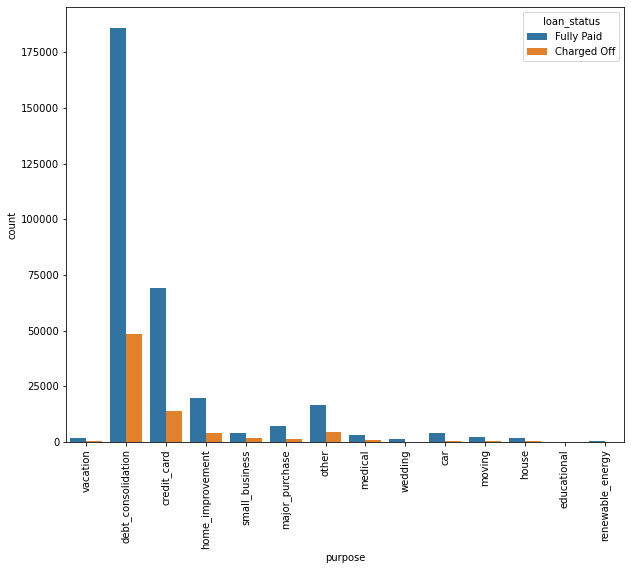

In [1772]:
plt.figure(figsize=(10,8))
g=sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90);

<AxesSubplot:xlabel='term', ylabel='count'>

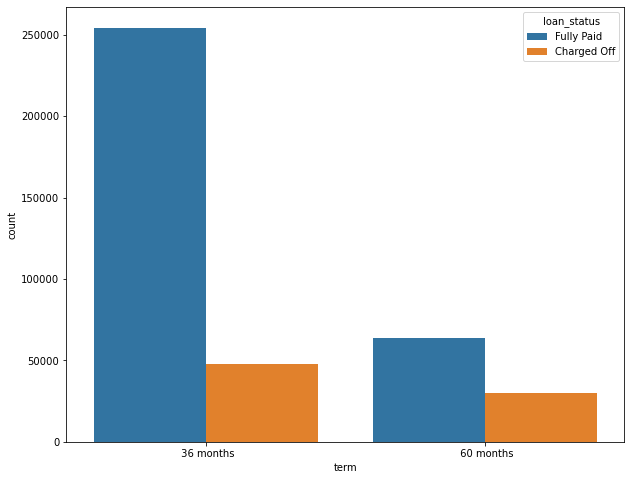

In [1773]:
plt.figure(figsize=(10,8))
sns.countplot(x='term', data=df, hue='loan_status')

##### "Borrowers who used the loan amount for debt consolidation, credit card payments, and small business investments have a significantly higher likelihood of defaulting on their loans."

In [1774]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [1775]:
df['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

[Text(0, 0, '10+ years'),
 Text(1, 0, '4 years'),
 Text(2, 0, '< 1 year'),
 Text(3, 0, '6 years'),
 Text(4, 0, '9 years'),
 Text(5, 0, '2 years'),
 Text(6, 0, '3 years'),
 Text(7, 0, '8 years'),
 Text(8, 0, '7 years'),
 Text(9, 0, '5 years'),
 Text(10, 0, '1 year')]

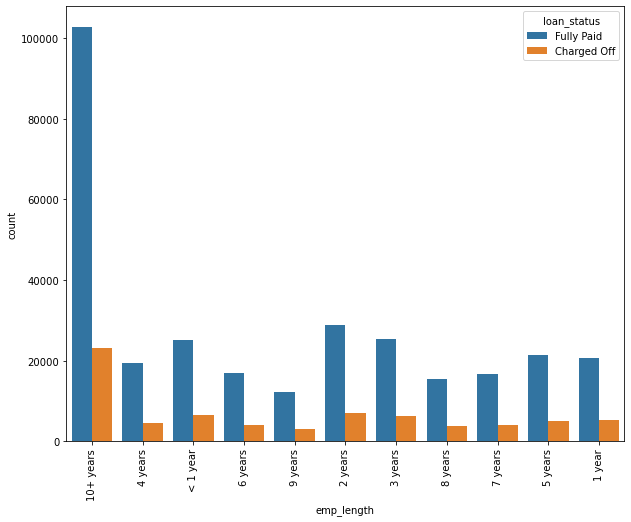

In [1776]:
plt.figure(figsize=(10,8))
g=sns.countplot(x='emp_length',data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

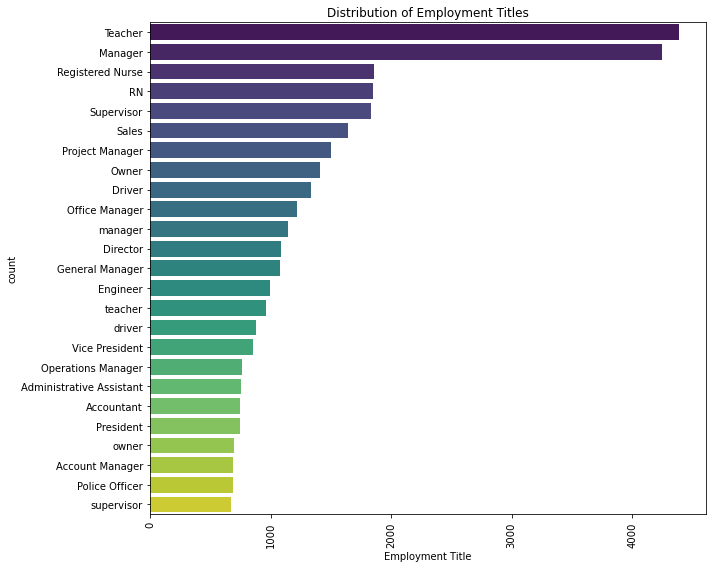

In [1777]:
plt.figure(figsize=(10,8))
top_20_emp_titles=df['emp_title'].value_counts().head(25)

sns.barplot(x=top_20_emp_titles,y=top_20_emp_titles.index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Distribution of Employment Titles")
plt.xlabel("Employment Title")
plt.ylabel('count')
plt.tight_layout()

#### Application Type 

<AxesSubplot:xlabel='application_type'>

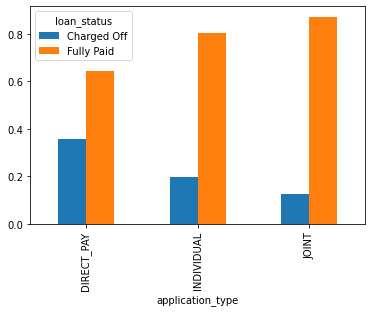

In [1778]:
df['application_type'].value_counts()
pd.crosstab(index=df["application_type"],columns=df["loan_status"], normalize='index').plot(kind="bar")

### Feature Engineering

In [1779]:
# We have identified certain columns with high outliers. 
# Instead of deleting the records associated with these outliers, 
# we will flag any value greater than 0 as 1. 
# This approach allows us to consider the possibility that individuals 
# who are taking a loan for the first time may have a low bankruptcy record.

# Creation of Flags:
# For the columns pub_rec, mort_acc, and pub_rec_bankruptcies, 
# you can create flags based on a condition. 
# If the value is greater than 1.0, set the flag to 1; otherwise, set it to 0. 

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number



In [1780]:

df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)


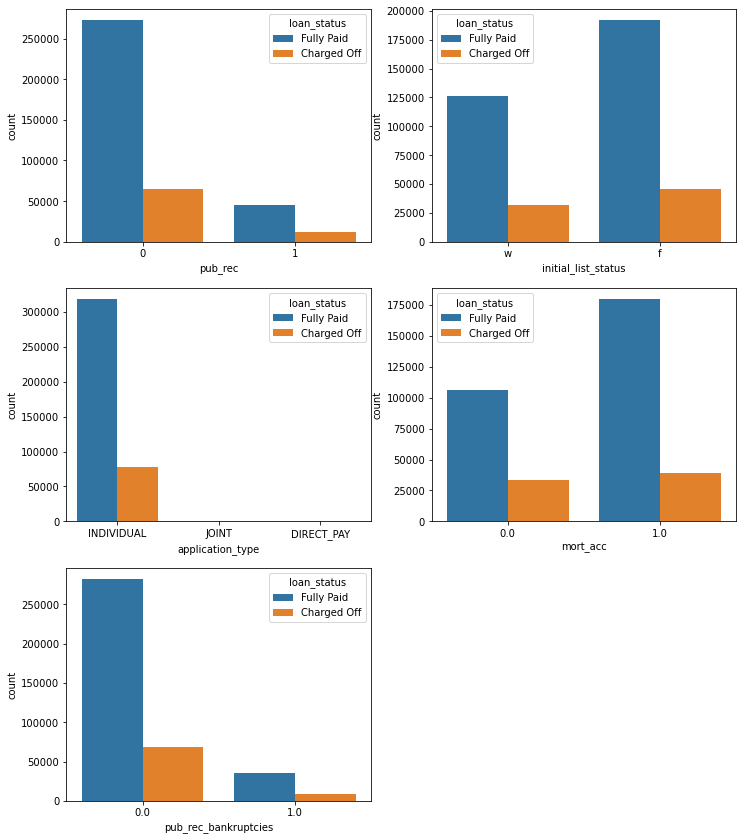

In [1781]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=df, hue='loan_status')
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')
plt.show()

In [1782]:
# def feature_engineering(df):
#     # Flag creation
#     df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
#     df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
#     df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)

#     # Missing value treatment
#     df['pub_rec'].fillna(0, inplace=True)
#     df['mort_acc'].fillna(0, inplace=True)
#     df['pub_rec_bankruptcies'].fillna(0, inplace=True)

#     # Outlier treatment
#     df.loc[df['pub_rec'] > 1.0, 'pub_rec'] = 1.0
#     df.loc[df['mort_acc'] > 1.0, 'mort_acc'] = 1.0
#     df.loc[df['pub_rec_bankruptcies'] > 1.0, 'pub_rec_bankruptcies'] = 1.0

#     return df

In [1783]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [1784]:
# Mapping of target variable
# if loan_status is Fully Paid : 0
# if loan_status is Charged Off : 1
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off': 1})

In [1785]:
# (df.isna().sum()/df.shape[0])*100

In [1786]:
missing_values_df[missing_values_df["Missing Percentage"]>0]

,Missing Values,Missing Percentage
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


#### Mean Target Imputation

In [1787]:
# df.groupby(by='total_acc').mean()

In [1788]:
total_acc_avg=df.groupby(by='total_acc').mean().mort_acc
# saving mean of mort_acc according to total_acc_avg

In [1789]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [1790]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [1791]:
missing_values_df[missing_values_df['Missing Percentage']>0]

,Missing Values,Missing Percentage
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [1792]:
(df.isna().sum()/df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

#### Target Encoding For 'pub_rec_bankruptcies'

    "Given that there are 535 missing records for the 'pub_rec_bankruptcies' column, blindly removing or imputing them with the most frequent value may not be appropriate. Instead, assigning a probability value to represent the likelihood of having a public record bankruptcy for these missing records can be a more reasonable approach."

In [1793]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    350380
1.0     45115
NaN       535
Name: pub_rec_bankruptcies, dtype: int64

In [1794]:
# df["pub_rec_bankruptcies"].fillna(0).value_counts(dropna=False)

In [1795]:
from category_encoders import TargetEncoder
TE= TargetEncoder()

C:\Users\Sweta.Singh\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Sweta.Singh\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [1796]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna("Record_not_found").astype('str')


In [1797]:
df["pub_rec_bankruptcies"].value_counts(dropna=False)

0.0                 350380
1.0                  45115
Record_not_found       535
Name: pub_rec_bankruptcies, dtype: int64

In [1798]:
df["pub_rec_bankruptcies"] = TE.fit_transform(df["pub_rec_bankruptcies"],df["loan_status"])

In [1799]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

0.194991    350380
0.205364     45115
0.162617       535
Name: pub_rec_bankruptcies, dtype: int64

In [1800]:
(df.isna().sum()/df.shape[0]) *100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
dtype: float64

In [1801]:
# Dropping the rest of the missing values

In [1802]:
df.dropna(inplace=True)

In [1803]:
df.shape

(371126, 26)

In [1804]:
# Outliers Detection

In [1805]:
# def Outlier_treatment(df):
# # Outlier treatment
#     df.loc[df['pub_rec'] > 1.0, 'pub_rec'] = 1.0
#     df.loc[df['mort_acc'] > 1.0, 'mort_acc'] = 1.0
#     df.loc[df['pub_rec_bankruptcies'] > 1.0, 'pub_rec_bankruptcies'] = 1.0

#     return df

In [1806]:
numerical=df.select_dtypes(include='number')
numerical

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0.194991
1,8000.0,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1.0,0.194991
2,15600.0,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0.194991
3,7200.0,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0.194991
4,24375.0,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1.0,0.194991
5,20000.0,13.33,86788.0,0,16.31,8.0,0,25757.0,100.6,23.0,1.0,0.194991
6,18000.0,5.32,125000.0,0,1.36,8.0,0,4178.0,4.9,25.0,1.0,0.194991
7,13000.0,11.14,46000.0,0,26.87,11.0,0,13425.0,64.5,15.0,0.0,0.194991
8,18900.0,10.99,103000.0,0,12.52,13.0,0,18637.0,32.9,40.0,1.0,0.194991
9,26300.0,16.29,115000.0,0,23.69,13.0,0,22171.0,82.4,37.0,1.0,0.194991


In [1807]:
len(numerical)

371126

In [1808]:
col=numerical.columns
len(col)

12

In [1809]:
col=['loan_amnt', 'int_rate', 'annual_inc',  'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc' ]

In [1810]:
outlier=df.copy()

In [1811]:
for i in col:
    mean=outlier[i].mean()
    std=outlier[i].std()
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    outlier=outlier[(outlier[i]<upper_limit)& (outlier[i]>lower_limit)]
outlier.shape

(355005, 26)

In [1812]:
outlier

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,0,vacation,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.194991,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.194991,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.194991,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.194991,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.194991,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,2015-09-01,0,debt_consolidation,debt consolidation,16.31,2005-01-01,8.0,0,25757.0,100.6,23.0,f,INDIVIDUAL,1.0,0.194991,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,0,home_improvement,home improvement,1.36,2005-08-01,8.0,0,4178.0,4.9,25.0,f,INDIVIDUAL,1.0,0.194991,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,2012-09-01,0,credit_card,no more credit cards,26.87,1994-09-01,11.0,0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.194991,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,2014-10-01,0,debt_consolidation,debt consolidation,12.52,1994-06-01,13.0,0,18637.0,32.9,40.0,w,INDIVIDUAL,1.0,0.194991,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,2012-04-01,0,debt_consolidation,debt consolidation,23.69,1997-12-01,13.0,0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.194991,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [1813]:
numerical_data=outlier.select_dtypes(include='number')
# numerical_data
col=numerical_data.columns
len(col)

12

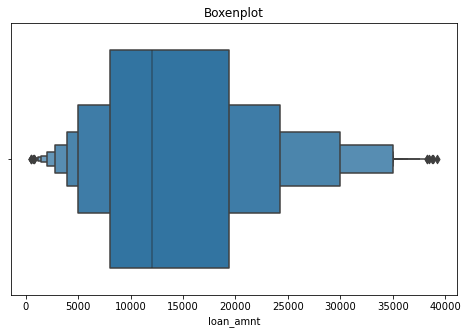

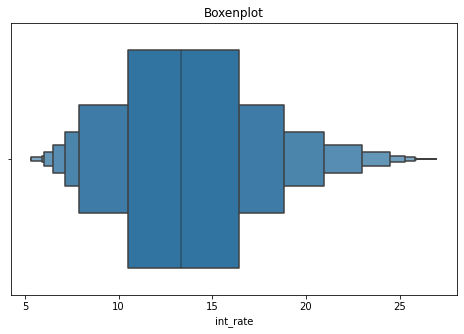

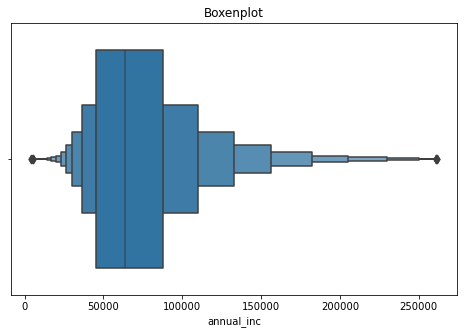

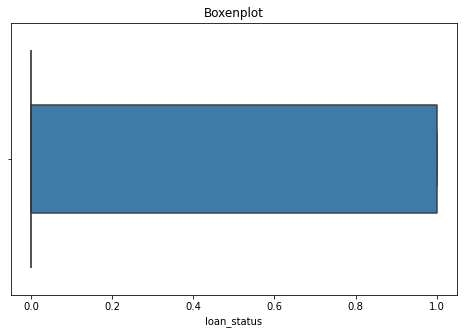

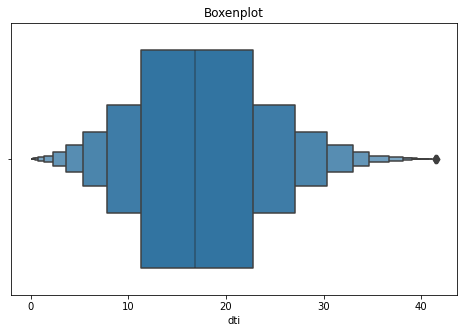

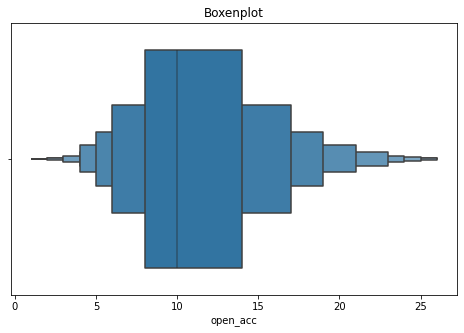

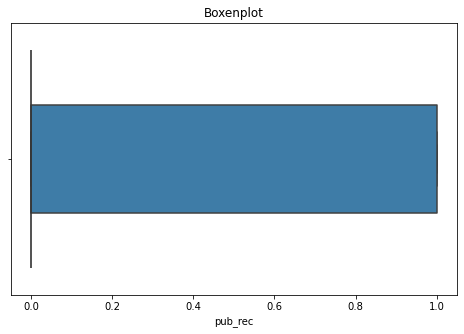

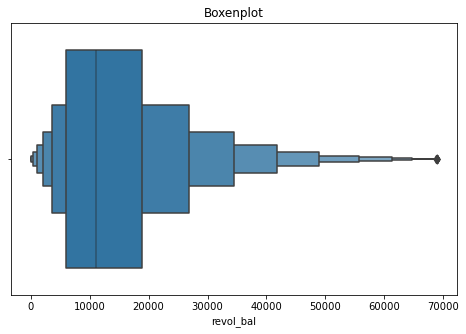

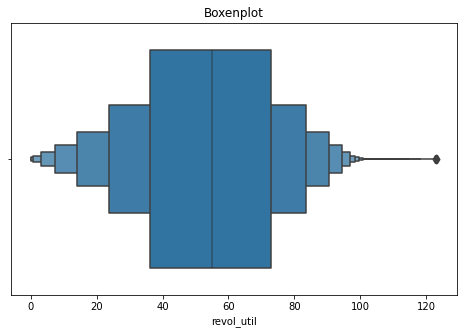

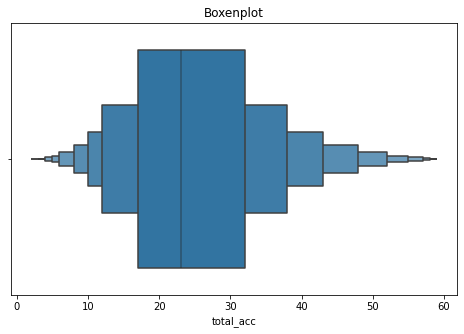

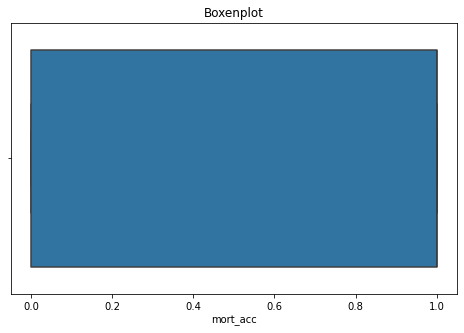

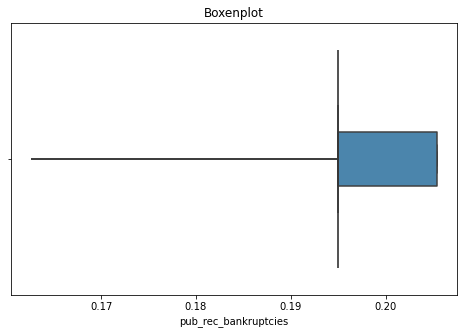

In [1814]:
def box_plot(i):
    plt.figure(figsize=(8,5))
    sns.boxenplot(x=outlier[i])
    plt.title('Boxenplot')
    plt.show()
for i in col:
    box_plot(i)

In [1815]:
# Data Preprocessing

In [1816]:
data=outlier.copy()

In [1817]:
data['term'] = data['term'].str.extract('(\d+)').astype(int)

In [1818]:
# data['term']=data.term.map({'36 months':36, '60 months': 60})

In [1819]:
data

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,0,vacation,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.194991,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.194991,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.194991,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.194991,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.194991,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36,13.33,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,2015-09-01,0,debt_consolidation,debt consolidation,16.31,2005-01-01,8.0,0,25757.0,100.6,23.0,f,INDIVIDUAL,1.0,0.194991,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36,5.32,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,0,home_improvement,home improvement,1.36,2005-08-01,8.0,0,4178.0,4.9,25.0,f,INDIVIDUAL,1.0,0.194991,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36,11.14,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,2012-09-01,0,credit_card,no more credit cards,26.87,1994-09-01,11.0,0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.194991,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60,10.99,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,2014-10-01,0,debt_consolidation,debt consolidation,12.52,1994-06-01,13.0,0,18637.0,32.9,40.0,w,INDIVIDUAL,1.0,0.194991,USCGC Tran\r\nFPO AP 22690
9,26300.0,36,16.29,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,2012-04-01,0,debt_consolidation,debt consolidation,23.69,1997-12-01,13.0,0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.194991,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [1820]:
data['initial_list_status']= data.initial_list_status.map({'w':0,'f':1})

In [1821]:
data

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,0,vacation,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.194991,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0.194991,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.194991,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.194991,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.194991,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36,13.33,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,2015-09-01,0,debt_consolidation,debt consolidation,16.31,2005-01-01,8.0,0,25757.0,100.6,23.0,1,INDIVIDUAL,1.0,0.194991,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36,5.32,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,2015-09-01,0,home_improvement,home improvement,1.36,2005-08-01,8.0,0,4178.0,4.9,25.0,1,INDIVIDUAL,1.0,0.194991,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36,11.14,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,2012-09-01,0,credit_card,no more credit cards,26.87,1994-09-01,11.0,0,13425.0,64.5,15.0,1,INDIVIDUAL,0.0,0.194991,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60,10.99,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,2014-10-01,0,debt_consolidation,debt consolidation,12.52,1994-06-01,13.0,0,18637.0,32.9,40.0,0,INDIVIDUAL,1.0,0.194991,USCGC Tran\r\nFPO AP 22690
9,26300.0,36,16.29,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,2012-04-01,0,debt_consolidation,debt consolidation,23.69,1997-12-01,13.0,0,22171.0,82.4,37.0,1,INDIVIDUAL,1.0,0.194991,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [1822]:
data.address.apply(lambda x: x[-5:])

0         22690
1         05113
2         05113
3         00813
4         11650
5         30723
6         22690
7         30723
8         22690
9         00813
10        00813
12        70466
14        29597
15        30723
16        00813
17        30723
18        70466
19        05113
20        30723
21        05113
22        05113
23        22690
24        30723
25        30723
26        48052
27        05113
28        05113
29        48052
30        48052
31        70466
          ...  
395998    05113
396000    22690
396001    22690
396002    70466
396003    48052
396004    48052
396005    30723
396006    05113
396007    00813
396008    48052
396009    70466
396010    05113
396011    30723
396012    29597
396013    93700
396014    05113
396016    70466
396017    05113
396018    29597
396019    30723
396020    70466
396021    00813
396022    70466
396023    05113
396024    05113
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: address, Length: 3

In [1823]:
data['zip_code']=data.address.apply(lambda x: x[-5:])

In [1824]:
data['zip_code'].value_counts(normalize=True)*100

70466    14.378671
30723    14.282616
22690    14.269095
48052    14.125153
00813    11.611949
29597    11.537302
05113    11.517021
93700     2.773764
11650     2.771229
86630     2.733201
Name: zip_code, dtype: float64

In [1825]:
# Dropping some variables which we can let go for now 
data.drop(columns=['issue_d','title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

In [1826]:
data["emp_title"].nunique() # target_encoding

167202

In [1827]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

data["emp_title"] = TE.fit_transform(data["emp_title"],data["loan_status"])

C:\Users\Sweta.Singh\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Sweta.Singh\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [1828]:
# data

In [1829]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code'],
      dtype='object')

In [1830]:
# One-hot-encoding

In [1831]:
encode=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
data=pd.get_dummies(data, columns=encode, drop_first=True)

In [1832]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows',None)
data.head()

,loan_amnt,term,int_rate,emp_title,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,0.243902,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.194991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,0.316535,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.194991,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,0.199999,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.194991,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,7200.0,36,6.49,0.192411,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.194991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,0.192411,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.194991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [1833]:
data.shape

(355005, 50)

In [1834]:
# Data Preparation for modeling

In [1835]:
X=data.drop("loan_status", axis=1)
y= data['loan_status']

In [1836]:
X.shape, y.shape

((355005, 49), (355005,))

In [1837]:
#  train-test-split:

In [1838]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [1839]:
X_train.shape, X_test.shape

((248503, 49), (106502, 49))

In [1840]:
non_scaled_train=X_train.copy()

In [1841]:
non_scaled_test=X_test.copy()

In [1842]:
# Scaling the Data 

In [1843]:
from sklearn.preprocessing import StandardScaler

In [1844]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [1845]:
X_train=scaler.transform(X_train)

In [1846]:
X_test=scaler.transform(X_test)

In [1847]:
# MinMaxScaler -
# For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 
# The range is the difference between the original maximum and original minimum.

# MinMaxScaler preserves the shape of the original distribution. 
# It doesn’t meaningfully change the information embedded in the original data.

scaler= MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [1848]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or any other imputation strategy
    ('classifier', LogisticRegression())
])

pipeline.fit(X, y)  # Fit the pipeline on the data

C:\Users\Sweta.Singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())])

In [1849]:
X.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
emp_title                              0
annual_inc                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
mort_acc                               0
pub_rec_bankruptcies                   0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewable_energy               0
purpose_small_bu

In [1871]:
#Logistic Regression

In [1872]:
from sklearn.linear_model import LogisticRegression


In [1873]:
model= LogisticRegression(penalty='l2',         # L2 - ridge regularisation
    dual=False,
    tol=0.0001,
    C=1.0,# 1/lambda : 
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,# 1000 iterations for learning 
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

In [1874]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1875]:
model.score(X_train,y_train)

0.8989831108678769

In [1876]:
model.score(X_test,y_test)

0.8977014516159321

In [1877]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [1878]:
y_pred=model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[84515,  1282],
       [ 9613, 11092]], dtype=int64)

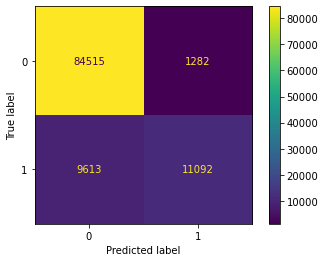

In [1879]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=[0,1]).plot()
plt.show()

In [1880]:
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score

In [1881]:
fbeta_score(y_true=y_test,y_pred=y_pred,beta=0.6)

0.7608065443468262

In [1882]:
precision_score(y_true=y_test,
               y_pred=y_pred)

0.8963956683368353

In [1883]:
recall_score(y_true=y_test,
            y_pred=y_pred)

0.5357160106254528

In [1884]:
from sklearn.metrics import classification_report

In [1885]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.897873,0.985058,0.939447,85797.000000
1,0.896396,0.535716,0.670637,20705.000000
accuracy,0.897701,0.897701,0.897701,0.897701
macro avg,0.897134,0.760387,0.805042,106502.000000
weighted avg,0.897586,0.897701,0.887188,106502.000000


In [1886]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     85797
           1       0.90      0.54      0.67     20705

    accuracy                           0.90    106502
   macro avg       0.90      0.76      0.81    106502
weighted avg       0.90      0.90      0.89    106502



 ##### **ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    True Positive Rate
    False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

    TPR=(TP)/(TP+FN)
    
False Positive Rate (FPR) is defined as follows:

    FPR=(FP)/(FP+TN)
    
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

##### **AUC (Area under the ROC Curve)

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions.

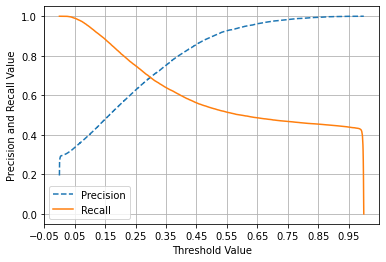

In [1887]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='Precision')
    # plot recall
    plt.plot(thresholds, recalls[:threshold_boundary], label='Recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:, 1])

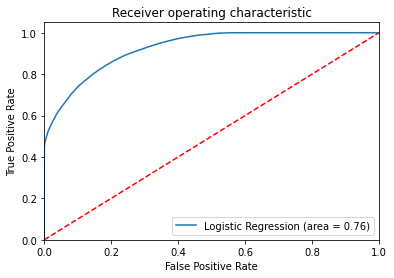

In [1888]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [1889]:
# checking for Multicollinearity

##### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF. In VIF method, we pick each independent feature and regress it against all of the other independent features. VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [1890]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1895]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
13,pub_rec_bankruptcies,3445.80
44,application_type_INDIVIDUAL,3317.58
2,int_rate,122.99
15,purpose_debt_consolidation,51.37
1,term,27.36


In [1896]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
13,pub_rec_bankruptcies,166.62
2,int_rate,122.98
15,purpose_debt_consolidation,51.25
1,term,27.34
14,purpose_credit_card,18.58


In [1897]:
X.drop(columns=['pub_rec_bankruptcies'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,int_rate,103.07
14,purpose_debt_consolidation,28.00
1,term,24.38
6,open_acc,13.73
10,total_acc,12.65


In [1898]:
X.drop(columns=['int_rate'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,23.44
13,purpose_debt_consolidation,23.14
5,open_acc,13.62
9,total_acc,12.65
8,revol_util,9.05


In [1899]:
X.drop(columns=['purpose_debt_consolidation'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,19.64
5,open_acc,13.21
9,total_acc,12.65
8,revol_util,8.40
4,dti,7.77


In [1900]:
X.drop(columns=['term'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
4,open_acc,13.13
8,total_acc,12.60
7,revol_util,8.35
2,annual_inc,7.67
3,dti,7.66


In [1901]:
X.drop(columns=['open_acc'],axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
7,total_acc,8.24
6,revol_util,8.03
2,annual_inc,7.58
3,dti,7.13
0,loan_amnt,6.72


In [1903]:
X=scaler.fit_transform(X)
kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(model,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy :{:.3f}".format(accuracy))

Cross Validation accuracy :0.898


In [1904]:
# Oversamling using SMOTE

In [1906]:
sm=SMOTE(random_state=42)
X_train_res, y_train_res=sm.fit_resample(X_train, y_train.ravel())

In [1908]:
print('After Oversampling the shape of train_X: {}'.format(X_train_res.shape))
print('After Oversampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After Oversampling, counts of label '1': {}". format(sum(y_train_res==1)))
print("After Oversampling, counts of label '0': {}" .format(sum(y_train_res==0)))

After Oversampling the shape of train_X: (401802, 49)
After Oversampling, the shape of train_y: (401802,) 

After Oversampling, counts of label '1': 200901
After Oversampling, counts of label '0': 200901


In [1909]:
# logistic regression

In [1912]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
predictions=lr.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     85797
           1       0.54      0.82      0.65     20705

    accuracy                           0.83    106502
   macro avg       0.75      0.83      0.77    106502
weighted avg       0.87      0.83      0.84    106502



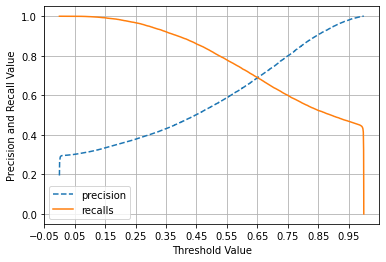

In [1916]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:,1])


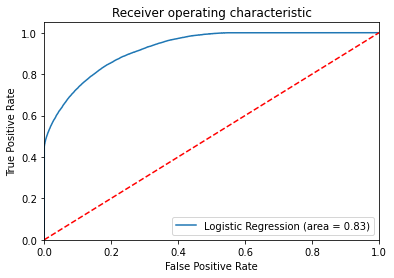

In [1917]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [1918]:
# Decision Tree Classifier

In [1920]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_res, y_train_res)
predictions=dt_classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     85797
           1       0.53      0.65      0.59     20705

    accuracy                           0.82    106502
   macro avg       0.72      0.76      0.74    106502
weighted avg       0.84      0.82      0.83    106502



In [1921]:
kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(model,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy :{:.3f}".format(accuracy))
dt_classifier.fit(X_train_res, y_train_res)
print("test score",dt_classifier.score(X_test, y_test))

Cross Validation accuracy :0.898
test score 0.8214024149781225


In [1922]:
from sklearn.model_selection import GridSearchCV

In [1923]:
dt_classifier = DecisionTreeClassifier
parameters  = {
    "max_depth" : [5,10,15],
    "min_samples_split" : [5,9],
    "min_samples_leaf" : [1,3,5]
}
GS_dt_classifier = GridSearchCV(estimator = dt_classifier(),param_grid=parameters
        )

In [1925]:
GS_dt_classifier.fit(X_train_res,y_train_res)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 9]})

In [1926]:
GS_dt_classifier.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_split=5)

In [1927]:
GS_dt_classifier.best_score_

0.8375494777179849

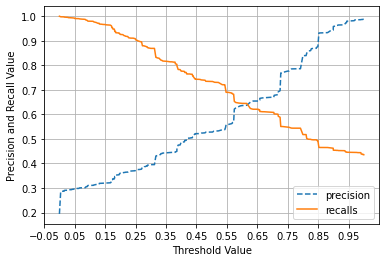

In [1931]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, GS_dt_classifier.predict_proba(X_test)[:,1])

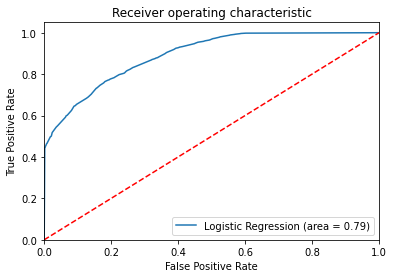

In [1932]:
logit_roc_auc = roc_auc_score(y_test, GS_dt_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GS_dt_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [1933]:
# Create a Decision Tree classifier object
GS_dt_classifier = DecisionTreeClassifier()
GS_dt_classifier.fit(X_train_res, y_train_res)
predictions=GS_dt_classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     85797
           1       0.53      0.65      0.58     20705

    accuracy                           0.82    106502
   macro avg       0.72      0.76      0.74    106502
weighted avg       0.84      0.82      0.83    106502



##### Insights 
    
    The mean and median of the interest rate indicate that there is variation in interest rates among borrowers. The distribution of loan amounts shows that the median loan amount is higher for borrowers who are more likely to be defaulters.

    Borrowers with loan grades E, F, and G have a higher probability of defaulting on their loans. This suggests that higher loan grades are associated with increased default risk.

    Among all loan grades, grade G has the highest conditional probability of having defaulters. This indicates that borrowers with grade G loans are at the highest risk of defaulting.

    The employment length of borrowers does not show a clear relationship with the loan status. Both fully paid and defaulters have similar probabilities across different employment lengths. Therefore, employment length does not seem to be a significant factor in predicting default.

    Borrowers who have rental homes have a higher probability of being defaulters compared to those with home mortgages or who own their homes. This suggests that the type of home ownership may be associated with default risk.

    The median annual income is slightly higher for borrowers whose loan status is fully paid. This indicates that borrowers with higher incomes are more likely to repay their loans successfully.

    Most borrowers take loans for debt consolidation and credit card payoffs. However, the probability of defaulters is higher among small business owners. This suggests that borrowers using loans for small business investments are at a higher risk of defaulting.

    The debt-to-income ratio is higher for defaulters. This indicates that borrowers with higher debt-to-income ratios are more likely to default on their loans.

    As the number of derogatory public records increases, the probability of borrowers being declared as defaulters also increases. This implies that borrowers with a history of derogatory public records are at a higher risk of default.

    The application type "Direct-Pay" has a higher probability of defaulters compared to individual and joint applications. This suggests that borrowers who choose the "Direct-Pay" application type are more likely to default on their loans.
    
    
##### Insights and Model Results:

    In the given dataset, NBFCs are willing to take risks by providing loans to borrowers with low credit grades, as long as they do not have a bankruptcy record in their credit report. This allows the company to maximize their earnings by charging higher interest rates to these borrowers, despite their higher probability of default.

    To address this, we performed feature engineering steps such as converting feature values to 1 for borrowers with more than 0 public records, mortgage accounts, or public recorded bankruptcy. This indicates that these borrowers are more likely to become defaulters.

###### Our goal in building the model was to minimize the following metrics:

    False Positive (FP): We aimed to minimize the number of borrowers falsely classified as defaulters. This helps to avoid missing out on potential opportunities and reduces the chances of falsely labeling borrowers as defaulters when they are not.

    False Negative (FN): We also aimed to minimize the number of borrowers falsely classified as non-defaulters. While this is a risk for the company, given that NBFCs are willing to take risks, we can be more lenient in this aspect.

    Therefore, our primary focus was on maximizing the Precision metric and F0.5 score, which prioritize the accurate identification of borrowers who are more likely to default. This approach helps in making informed decisions while minimizing the potential loss for the company.